In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# loading libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid',{"grid.color": ".6", "grid.linestyle": ":"})
%matplotlib inline
plt.rcParams["figure.figsize"] = (14, 7)

In [3]:
from google.cloud import bigquery

# creating client object (because it holds project and a connection to the bigquery services)

In [4]:
client=bigquery.Client()

Using Kaggle's public dataset BigQuery integration.


# creating a chicago_crime dataset object

In [5]:
chicago_crime_ref=client.dataset("chicago_crime", project="bigquery-public-data")

# API request to fetch the chicago_crime dataset

In [6]:
chicago_crime=client.get_dataset(chicago_crime_ref)

# creaing a crime table object

In [7]:
crime_ref=chicago_crime_ref.table('crime')

# API request to fetch crime table

In [8]:
crime=client.get_table(crime_ref)

# checking schema

In [9]:
crime.schema

[SchemaField('unique_key', 'INTEGER', 'REQUIRED', None, (), None),
 SchemaField('case_number', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('date', 'TIMESTAMP', 'NULLABLE', None, (), None),
 SchemaField('block', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('iucr', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('primary_type', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('description', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('location_description', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('arrest', 'BOOLEAN', 'NULLABLE', None, (), None),
 SchemaField('domestic', 'BOOLEAN', 'NULLABLE', None, (), None),
 SchemaField('beat', 'INTEGER', 'NULLABLE', None, (), None),
 SchemaField('district', 'INTEGER', 'NULLABLE', None, (), None),
 SchemaField('ward', 'INTEGER', 'NULLABLE', None, (), None),
 SchemaField('community_area', 'INTEGER', 'NULLABLE', None, (), None),
 SchemaField('fbi_code', 'STRING', 'NULLABLE', None, (), None),
 SchemaField('x_coord

# loading data in to dataframe with limited numbers

In [10]:
first10_rows=client.list_rows(crime,max_results=10).to_dataframe()
first10_rows

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,3351,HL619154,2005-09-18 01:13:00+00:00,103XX S WENTWORTH AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,34,49,01A,1176784.0,1836170.0,2005,2022-08-31 04:51:30+00:00,41.705791,-87.628241,"(41.705790877, -87.628240739)"
1,27240,JF505696,2022-12-10 07:20:00+00:00,000XX W 105TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,False,False,...,34,49,01A,1177939.0,1835349.0,2022,2022-12-17 03:49:39+00:00,41.703512,-87.624036,"(41.70351191, -87.624036004)"
2,747,G194349,2001-04-06 02:00:00+00:00,104XX S STATE ST,0110,HOMICIDE,FIRST DEGREE MURDER,PORCH,False,False,...,9,49,01A,1178093.0,1835851.0,2001,2022-09-18 04:45:51+00:00,41.704886,-87.623457,"(41.704885986, -87.623456938)"
3,22823,HZ459434,2016-10-03 02:56:00+00:00,106XX S STATE ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,34,49,01A,1178141.0,1834249.0,2016,2022-09-18 04:45:51+00:00,41.700489,-87.623330,"(41.700488788, -87.623329533)"
4,25831,JE181828,2021-03-28 12:11:00+00:00,007XX E 103RD ST,0110,HOMICIDE,FIRST DEGREE MURDER,GAS STATION,True,False,...,9,50,01A,1182951.0,1836828.0,2021,2022-08-31 04:51:30+00:00,41.707456,-87.605637,"(41.707455731, -87.605637491)"
5,23724,JA543618,2017-12-10 05:15:00+00:00,106XX S PERRY AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,34,49,01A,1177481.0,1834530.0,2017,2022-08-31 04:51:30+00:00,41.701275,-87.625738,"(41.701274797, -87.625737736)"
6,4210,HN539215,2007-08-20 02:40:00+00:00,104XX S CORLISS AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,9,50,01A,1183419.0,1836038.0,2007,2022-09-18 04:45:51+00:00,41.705277,-87.603948,"(41.705277006, -87.603948187)"
7,7451395,HS252974,2010-04-11 06:30:00+00:00,103XX S WABASH AVE,0263,CRIM SEXUAL ASSAULT,AGGRAVATED: KNIFE/CUT INSTR,ABANDONED BUILDING,False,False,...,9,49,02,1178406.0,1836224.0,2010,2018-02-10 03:50:01+00:00,41.705902,-87.622300,"(41.705902463, -87.622299502)"
8,5393782,HN234262,2007-03-18 06:00:00+00:00,003XX W 106TH ST,0265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,RESIDENCE,False,False,...,34,49,02,1175835.0,1834633.0,2007,2018-02-28 03:56:25+00:00,41.701594,-87.631762,"(41.701594397, -87.63176174)"
9,6581153,HP653445,2007-06-01 03:00:00+00:00,001XX W 107TH ST,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,...,34,49,02,1177377.0,1834005.0,2007,2018-02-28 03:56:25+00:00,41.699836,-87.626134,"(41.699836467, -87.626134333)"


# solving two queries one by one

# **What categories of crime exhibited the greatest year-over-year increase between 2015 and 2016?


In [11]:
query="""
    SELECT primary_type, year
    FROM `bigquery-public-data.chicago_crime.crime`
    WHERE year in (2015,2016)
    """
dry_run_config=bigquery.QueryJobConfig(dry_run=True)

dry_run_query_job=client.query(query,job_config=dry_run_config)

print(f"the query will be proccessed in {dry_run_query_job.total_bytes_processed} bytes")

the query will be proccessed in 155489726 bytes


In [12]:
one_gb=1000 *1000 * 1000

safe_config=bigquery.QueryJobConfig(maximum_bytes_billed=one_gb)

safe_query_job=client.query(query,job_config=safe_config)

crime_cat=safe_query_job.to_dataframe()


In [13]:
crime_cat_groupby=crime_cat.groupby('year')['primary_type'].value_counts().sort_values(ascending=False)

In [14]:
crime_cat_groupby_temp=crime_cat_groupby[:50]

In [15]:
crime_cat_groupby_temp=crime_cat_groupby_temp.reset_index(level=[0,1],name=('year','primary_type'))

In [16]:
crime_cat_groupby_temp.columns=['year','primary_type','freuency']

# viewing the results in a dataframe with a small number of values

In [17]:
crime_cat_groupby_temp[:10]

,year,primary_type,freuency
0,2016,THEFT,61619
1,2015,THEFT,57350
2,2016,BATTERY,50299
3,2015,BATTERY,48923
4,2016,CRIMINAL DAMAGE,31018
5,2015,CRIMINAL DAMAGE,28676
6,2015,NARCOTICS,23939
7,2016,DECEPTIVE PRACTICE,19327
8,2016,ASSAULT,18742
9,2015,OTHER OFFENSE,17566


# visualizing the query output 

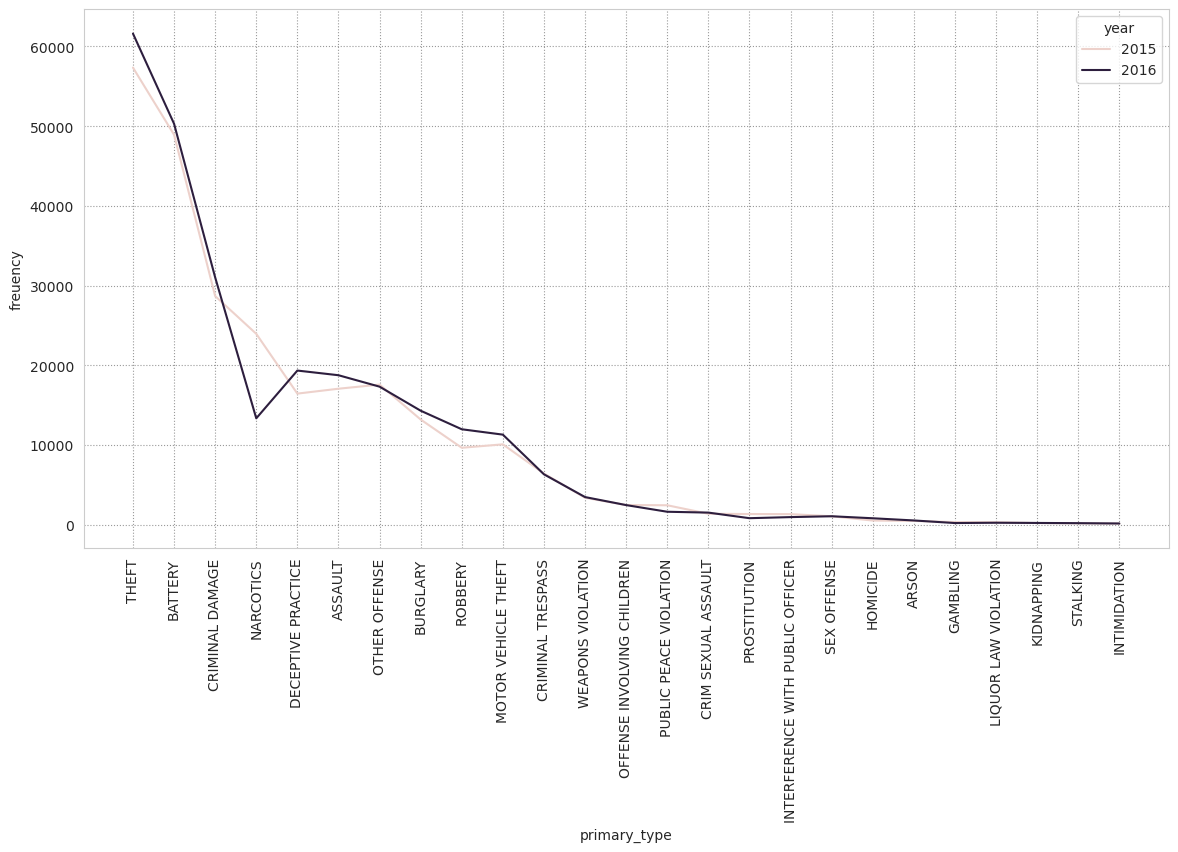

In [18]:
sns.lineplot(data=crime_cat_groupby_temp,x='primary_type',y='freuency',hue='year')
plt.xticks(rotation=90)
plt.show()

# output

# By adding 4268 additional instances from 2015 to 2016, theft rose

# now second query

# **Which month generally has the greatest number of motor vehicle thefts?

In [19]:
query="""
    SELECT EXTRACT(month FROM DATE) AS month,primary_type
    FROM `bigquery-public-data.chicago_crime.crime`
    WHERE primary_type='MOTOR VEHICLE THEFT'
    """
dry_run_config=bigquery.QueryJobConfig(dry_run=True)

dry_run_query_job=client.query(query,job_config=dry_run_config)

print(f"the query will be proccessed in {dry_run_query_job.total_bytes_processed} bytes")

the query will be proccessed in 155489726 bytes


In [20]:
one_gb=1000 *1000 * 1000

safe_config=bigquery.QueryJobConfig(maximum_bytes_billed=one_gb)

safe_query_job=client.query(query,job_config=safe_config)

crime_cat=safe_query_job.to_dataframe()

In [21]:
crime_cat_month=crime_cat.groupby('month')['primary_type'].value_counts().sort_values(ascending=False)

In [22]:
crime_cat_month

month  primary_type       
10     MOTOR VEHICLE THEFT    33760
1      MOTOR VEHICLE THEFT    33046
8      MOTOR VEHICLE THEFT    32724
7      MOTOR VEHICLE THEFT    32665
12     MOTOR VEHICLE THEFT    32000
9      MOTOR VEHICLE THEFT    31711
11     MOTOR VEHICLE THEFT    31632
6      MOTOR VEHICLE THEFT    30416
3      MOTOR VEHICLE THEFT    30161
5      MOTOR VEHICLE THEFT    29634
4      MOTOR VEHICLE THEFT    27909
2      MOTOR VEHICLE THEFT    27280
Name: primary_type, dtype: int64

In [23]:
crime_cat_month=crime_cat_month.reset_index(level=[0,1],name=('month','primary_type'))

In [24]:
crime_cat_month.columns=['month','primary_type','freuency']

# viewing the results in a dataframe with a small number of values second time

In [25]:
crime_cat_month

,month,primary_type,freuency
0,10,MOTOR VEHICLE THEFT,33760
1,1,MOTOR VEHICLE THEFT,33046
2,8,MOTOR VEHICLE THEFT,32724
3,7,MOTOR VEHICLE THEFT,32665
4,12,MOTOR VEHICLE THEFT,32000
5,9,MOTOR VEHICLE THEFT,31711
6,11,MOTOR VEHICLE THEFT,31632
7,6,MOTOR VEHICLE THEFT,30416
8,3,MOTOR VEHICLE THEFT,30161
9,5,MOTOR VEHICLE THEFT,29634


# visualizing the query output second time

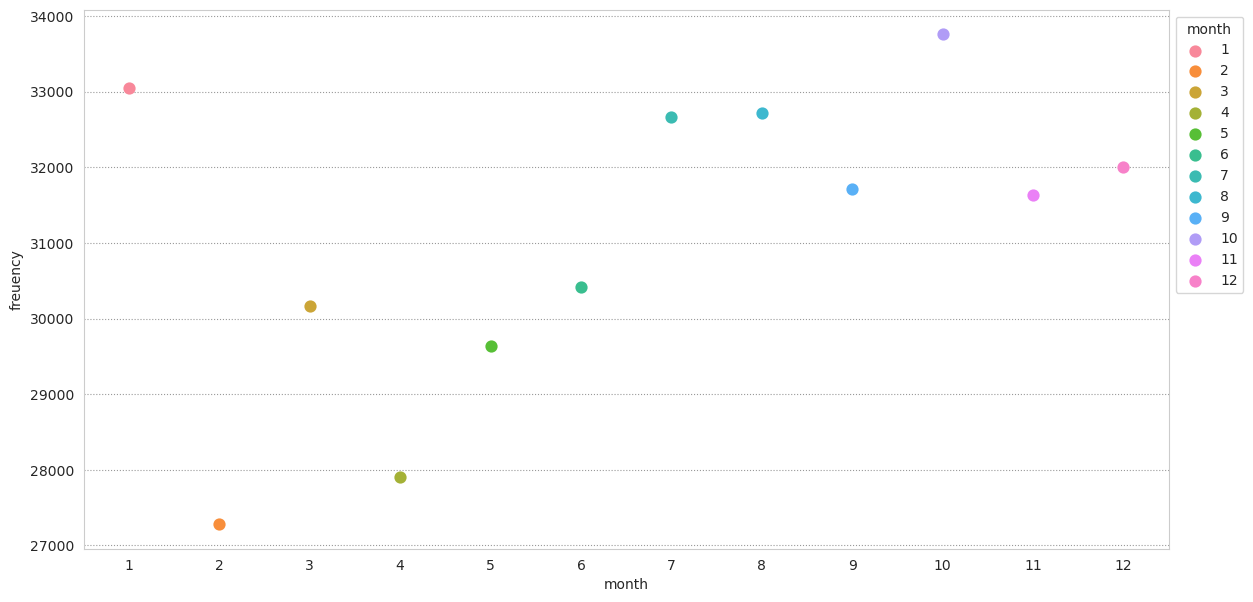

In [26]:
ax=sns.pointplot(data=crime_cat_month,x='month',y='freuency',hue='month')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

# output 

# Most motor vehicle thefts occur in the month of October

# Please vote for me and comment if you like my work so it allows me to improve on it.